In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
from random import sample
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [97]:
im = imageio.imread("Mona_Lisa.jpg")

In [98]:
x = sample(list(np.ndindex(r.shape[0],r.shape[1])), int(r.shape[0]*r.shape[1]*0.01))
x = np.array(x)

In [99]:
y = []
for p in x:
    y.append(im[p[0],p[1],:])
    
y = np.array(y)

In [100]:
print(x.shape)
print(y.shape)

(5436, 2)
(5436, 3)


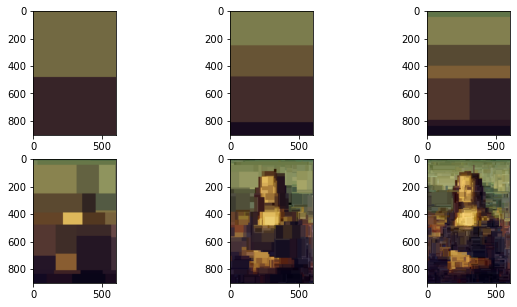

In [108]:
fig, ax = plt.subplots(2,3,figsize=(10,5))
depths = [1,2,3,5,10,15]
for i in range(6):
    rf = RandomForestRegressor(n_estimators=1,max_depth=depths[i])
    rf.fit(x, y)
    pred = rf.predict(list(np.ndindex(r.shape[0],r.shape[1]))).reshape(r.shape[0],-1,3)
    ax[i//3][i%3].imshow(pred.astype(int))

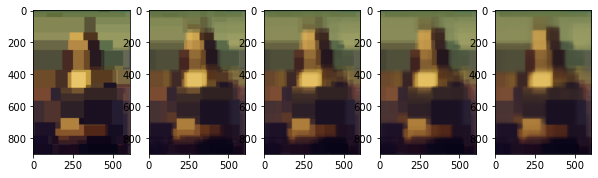

In [107]:
fig, ax = plt.subplots(1,5, figsize=(10,5))
n_estims = [1,3,5,10,100]
for i in range(5):
    rf = RandomForestRegressor(n_estimators=n_estims[i],max_depth=7,random_state=8912)
    rf.fit(x, y)
    pred = rf.predict(list(np.ndindex(r.shape[0],r.shape[1]))).reshape(r.shape[0],-1,3)
    ax[i].imshow(pred.astype(int))

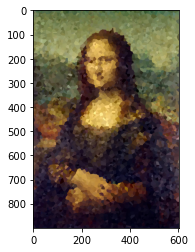

In [113]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x,y)
pred = knn.predict(list(np.ndindex(r.shape[0],r.shape[1]))).reshape(r.shape[0],-1,3)
plt.imshow(pred.astype(int))